In [1]:
import requests
from bs4 import BeautifulSoup

deathrow = requests.get('https://www.tdcj.state.tx.us/death_row/dr_executed_offenders.html').text
stat = BeautifulSoup(deathrow)

print stat

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml"><!-- InstanceBegin template="/Templates/sub_template.dwt" codeOutsideHTMLIsLocked="false" -->
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="../stylesheets/sub_css.css" rel="stylesheet" type="text/css"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<!-- InstanceBeginEditable name="DCMetaTags" -->
<meta content="Texas Department of Criminal Justice" name="DC.Title"/>
<meta content="Texas Department of Criminal Justice" name="DC.Creator"/>
<meta content="20000302" name="DC.Date"/>
<meta content="text/html" name="DC.Format.MIME"/>
<meta content="Internet browser" name="DC.Format.SysReq"/>
<meta content="http://www.tdcj.texas.gov/" name="DC.Identifier"/>
<meta content="criminal justice, administration of; Texas Department of Criminal Justice; c

In [2]:
tab = stat.find("table", attrs={"class":"os"})
print tab

<table class="os" summary="This table provides a summary of executed offenders with links to their last statements." width="100%">
<tbody>
<tr>
<th scope="col">Execution</th>
<th scope="col">Link</th>
<th scope="col">Link</th>
<th scope="col">Last Name</th>
<th scope="col">First Name</th>
<th scope="col">TDCJ Number</th>
<th scope="col">Age</th>
<th scope="col">Date</th>
<th scope="col">Race</th>
<th scope="col">County</th></tr>
<tr>
<td>527</td>
<td><a href="dr_info/russeaugregory.html" title="Offender Information for Gregory Russeau">Offender Information</a></td>
<td><a href="dr_info/russeaugregorylast.html" title="Last Statement of Gregory Russeau">Last Statement</a></td>
<td>Russeau</td>
<td>Gregory</td>
<td>999430</td>
<td>46</td>
<td>06/18/2015</td>
<td>Black</td>
<td>Harris</td>
</tr>
<tr>
<td>526</td>
<td><a href="dr_info/bowerlester.jpg" title="Offender Information for Lester Bower">Offender Information</a></td>
<td><a href="dr_info/bowerlesterlast.html" title="Last Statement 

In [3]:
Execution=[]
OffInfo=[]
LinkLS=[]
Last=[]
First=[]
Number=[]
Age=[]
Date=[]
Race=[]
County=[]
for i in tab.findAll('tr'):
    td = i.findAll('td')
    for s, p in enumerate(td):
        if s==0:
            Execution.append(p.text)
        if s==1:
            for l in p.findAll('a'):
                OffInfo.append(l.get('href'))
        if s==2:
            for l in p.findAll('a'):
                LinkLS.append(l.get('href'))
        if s==3:
            Last.append(p.text)
        if s==4:
            First.append(p.text)
        if s==5:
            Number.append(p.text)
        if s==6:
            Age.append(p.text)
        if s==7:
            Date.append(p.text)
        if s==8:
            Race.append(p.text)
        if s==9:
            County.append(p.text)
print LinkLS

['dr_info/russeaugregorylast.html', 'dr_info/bowerlesterlast.html', 'dr_info/charlesderricklast.html', 'dr_info/garzamanuellast.html', 'dr_info/sprousekentlast.html', 'dr_info/vasquezmanuellast.html', 'dr_info/newburydonaldlast.html', 'dr_info/laddrobertlast.html', 'dr_info/prietoarnoldlast.html', 'dr_info/paredesmiguellast.html', 'dr_info/colemanlisalast.html', 'dr_info/trottiewillielast.html', 'dr_info/villegasjoselast.html', 'dr_info/hernandezramirolast.html', 'dr_info/sellstommylast.html', 'dr_info/doyleanthonylast.html', 'dr_info/jasperraylast.html', 'dr_info/bassosuzannelast.html', 'dr_info/tamayoedgarlast.html', 'dr_info/martinjerrylast.html', 'dr_info/mccoskeyjamielast.html', 'dr_info/yowellmichaellast.html', 'dr_info/diazarturolast.html', 'dr_info/garzarobertlast.html', 'dr_info/feldmandouglaslast.html', 'dr_info/rossvaughnlast.html', 'dr_info/quintanillajohnlast.html', 'dr_info/mccarthykimberlylast.html', 'dr_info/chesterelroylast.html', 'dr_info/williamsjeffrey999350last.htm

In [5]:
root_url = "https://www.tdcj.state.tx.us/death_row/"

states = []

for link in LinkLS:
    obtain = requests.get(root_url+link)
    stat2 = BeautifulSoup(obtain.text)
    ps = stat2.find_all('p')
    temp = ""
    for i in range(6, len(ps)):
        temp = temp + ps[i].get_text()
    states.append(temp)
print states

[u'\u201cYes, I would like to thank my family and friends for what  y\u2019all have done for me.\xa0 Thank you for being here with me that I do not  have to transition alone.\xa0 I have peace.\xa0 To my daughter, I love you,  to my grandbabies, sisters and brothers, I love you.\xa0 I am ready to go  home.\u201d', u'"Much has been written about this case, not all of it has been the truth. But the time is over and now it is time to move on. I want to thank my attorneys for all that they have done. The have afforded me the last quarter of a century. I would like to thank my wife, my daughters, family and friends for unwavering support, and all of the letters and well wishes over the years. Now it is time to pass on. I have fought the good fight, I held the faith. I am not going to say goodbye, I will simply say until we meet again. I love you very, very much. Thank you Warden."', u" I'm ready to go home. ", u'"Thank you for being here. I am sorry for all of the pain that I have caused my 

In [6]:
len(states)

527

In [8]:
import pandas as pd
titles = {'Execution': Execution, 'OffInfo': OffInfo, 'LinkLS': LinkLS, 'Last': Last, 'First': First, 'Number': Number, 'Age': Age, 'Date': Date, 'Race': Race, 'County': County, 'Statements': states}
Exec = pd.DataFrame(data=titles, index=None)
print Exec
Exec.to_csv('Exec', encoding='utf-8')

    Age      County        Date Execution     First         Last  \
0    46      Harris  06/18/2015       527   Gregory      Russeau   
1    67     Grayson  06/03/2015       526    Lester        Bower   
2    32      Harris  05/12/2015       525   Derrick      Charles   
3    34       Bexar  04/15/2015       524    Manuel        Garza   
4    42       Ellis  04/09/2015       523      Kent      Sprouse   
5    46       Bexar  03/12/2015       522    Manuel      Vasquez   
6    53      Dallas  02/04/2015       521    Donald      Newbury   
7    57       Smith  01/29/2015       520    Robert         Ladd   
8    42       Bexar  01/21/2015       519    Arnold       Prieto   
9    32       Bexar  10/28/2014       518    Miguel      Paredes   
10   38     Tarrant  09/17/2014       517      Lisa      Coleman   
11   45      Harris  09/10/2014       516    Willie      Trottie   
12   39      Nueces  04/16/2014       515      Jose     Villegas   
13   44        Kerr  04/09/2014       514    Ram

In [9]:
import pandas as pd
Exec = pd.read_csv('Exec')
Exec['None'] = Exec.Statements.str.contains('This offender declined to make a last statement')
print(Exec.loc[Exec['None'] == True])

     Unnamed: 0  Age    County        Date  Execution     First    Last  \
14           14   49  ValVerde  04/03/2014        513     Tommy   Sells   
15           15   29    Dallas  03/27/2014        512   Anthony   Doyle   
17           17   59    Harris  02/05/2014        510   Suzanne   Basso   
18           18   46    Harris  01/22/2014        509     Edgar  Tamayo   
37           37   33     Gregg  11/08/2012        490     Mario   Swain   
392         392   45    Nueces  09/25/1997        135  Benjamin   Stone   

                             LinkLS  Number                    OffInfo  \
14      dr_info/sellstommylast.html  999367    dr_info/sellstommy.html   
15    dr_info/doyleanthonylast.html  999478  dr_info/doyleanthony.html   
17    dr_info/bassosuzannelast.html  999329  dr_info/bassosuzanne.html   
18     dr_info/tamayoedgarlast.html  999130    dr_info/tamayoedgar.jpg   
37      dr_info/swainmariolast.html  999475    dr_info/swainmario.html   
392  dr_info/stonebenjaminlast

In [10]:
Exec.isnull().sum()

Unnamed: 0      0
Age             0
County          0
Date            0
Execution       0
First           0
Last            0
LinkLS          0
Number          0
OffInfo         0
Race            0
Statements    102
None          102
dtype: int64

In [11]:
count=0
for i in Exec.LinkLS:
    if i=='dr_info/no_last_statement.html':
        count+=1
print count

102


In [12]:
st = list(Exec['Statements'])
s = []
for i in st:
    i = str(i)
    i= i.lower()
    s.append(i)
print s

['\xe2\x80\x9cyes, i would like to thank my family and friends for what  y\xe2\x80\x99all have done for me.\xc2\xa0 thank you for being here with me that i do not  have to transition alone.\xc2\xa0 i have peace.\xc2\xa0 to my daughter, i love you,  to my grandbabies, sisters and brothers, i love you.\xc2\xa0 i am ready to go  home.\xe2\x80\x9d', '"much has been written about this case, not all of it has been the truth. but the time is over and now it is time to move on. i want to thank my attorneys for all that they have done. the have afforded me the last quarter of a century. i would like to thank my wife, my daughters, family and friends for unwavering support, and all of the letters and well wishes over the years. now it is time to pass on. i have fought the good fight, i held the faith. i am not going to say goodbye, i will simply say until we meet again. i love you very, very much. thank you warden."', " i'm ready to go home. ", '"thank you for being here. i am sorry for all of t

In [13]:
Apologetic = ['sorry', 'apologize']
Thankful = ['thank', 'thanks']
Religious = ['god', 'jesus', 'allah', 'lord', 'savior']
Forgiveness = ['forgive']
Love = ['love']
FF = ['children', 'wife', 'daughter', 'son', 'husband', 'family', 'friend', 'friends', 'sister', 'brother']
Innocent = ['innocent', 'not guilty']

In [14]:
acount=0
for i in s:
    if any(x in i for x in Apologetic):
        acount+=1
print acount

151


In [15]:
lcount=0
for i in s:
    if any(x in i for x in Love):
        lcount+=1
print lcount

295


In [16]:
rcount=0
for i in s:
    if any(x in i for x in Religious):
        rcount+=1
print rcount

193


In [17]:
tcount=0
for i in s:
    if any(x in i for x in Thankful):
        tcount+=1
print tcount

158


In [18]:
fcount=0
for i in s:
    if any(x in i for x in Forgiveness):
        fcount+=1
print fcount

114


In [19]:
ffcount=0
for i in s:
    if any(x in i for x in FF):
        ffcount+=1
print ffcount

270


In [20]:
icount=0
for i in s:
    if any(x in i for x in Innocent):
        icount+=1
print icount

35


In [25]:
Sentiment = ['Apologetic','Love','Religious','Thankful','Forgiveness','Friends and Family','Innocent']
Count = [151, 295, 193, 158, 114, 270, 35]
data = {'Word Categories': Sentiment, 'Count': Count}
sentiment = pd.DataFrame(data, index=None)
print sentiment


   Count     Word Categories
0    151          Apologetic
1    295                Love
2    193           Religious
3    158            Thankful
4    114         Forgiveness
5    270  Friends and Family
6     35            Innocent


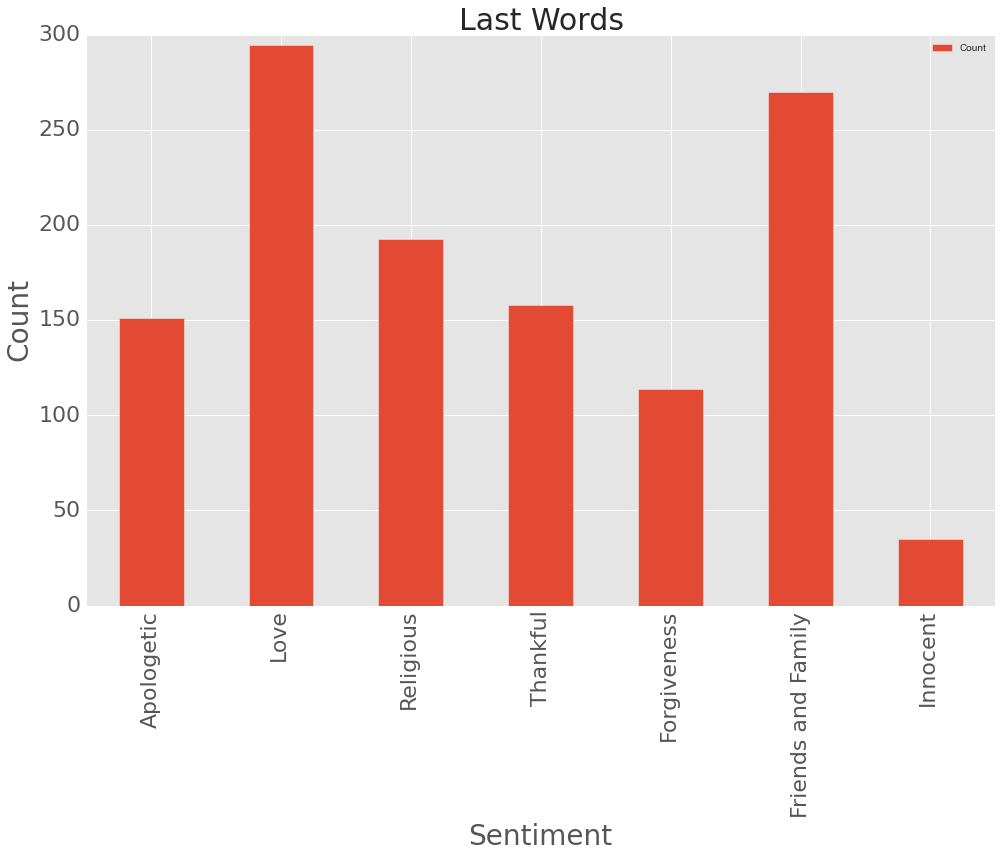

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = 14,12
senti = sentiment.plot(kind = 'bar')
plt.xlabel('Sentiment', fontsize=28)
plt.ylabel('Count', fontsize=28)
plt.title('Last Words', fontsize=30)
position=[0, 1, 2, 3, 4, 5, 6]
plt.xticks(position, Sentiment, fontsize=22)
plt.yticks(fontsize=22)
plt.tight_layout()
sent = senti.get_figure()
sent.savefig('senti.png')

In [29]:
Exec['Innocent'] = Exec.Statements.str.contains('innocent')
Exec['Guilty'] = Exec.Statements.str.contains('not guilty')
inno = (Exec.loc[Exec['Innocent'] == True])
gui = (Exec.loc[Exec['Guilty'] == True])
gi = pd.concat([inno, gui], axis = 1)
gi = gi.drop('None', 1)
gi = gi.drop('Innocent', 1)
gi = gi.drop('Guilty', 1)
print len(gi)
print gi
gi.to_csv('Innocent')

35
     Unnamed: 0  Age      County        Date  Execution     First  \
29           29   37      Harris  05/15/2013        498   Jeffrey   
35           35   46      Harris  11/15/2012        492   Preston   
40           40   44  Montgomery  10/10/2012        487  Jonathan   
47           47   52  Montgomery  03/07/2012        480     Keith   
60           60   46     Tarrant  05/03/2011        467      Cary   
95           95   34   Red River  03/03/2009        432    Willie   
108         108   42      Dallas  10/30/2008        419   Gregory   
121         121   37      Dallas  06/11/2008        406      Karl   
130         130   39     Randall  06/26/2007        397   Patrick   
137         137   51      Harris  03/29/2007        390       Roy   
152         152   29     Refugio  08/31/2006        375   Derrick   
205         NaN  NaN         NaN         NaN        NaN       NaN   
207         207   36     Navarro  02/17/2004        320   Cameron   
215         215   61      Harri

In [30]:
print max(s, key=len)

 i would like to say that i did not kill bobby lambert. that i'm an innocent black man that is being murdered. this is a lynching that is happening in america tonight. there's overwhelming and compelling evidence of my defense that has never been heard in any court of america. what is happening here is an outrage for any civilized country to anybody anywhere to look at what's happening here is wrong.  i thank all of the people that have rallied to my cause. they've been standing in support of me. who have finished with me.  i say to mr. lambert's family, i did not kill bobby lambert. you are pursuing the execution of an innocent man.  i want to express my sincere thanks to all of ya'll. we must continue to move forward and do everything we can to outlaw legal lynching in america. we must continue to stay strong all around the world, and people must come together to stop the systematic killing of poor and innocent black people. we must continue to stand together in unity and to demand a

In [35]:
Exec['Race'] = Exec['Race'].astype(str)
Exec.Race = Exec.Race.str.strip().str.lower()
raceplot = Exec.groupby('Race').size()

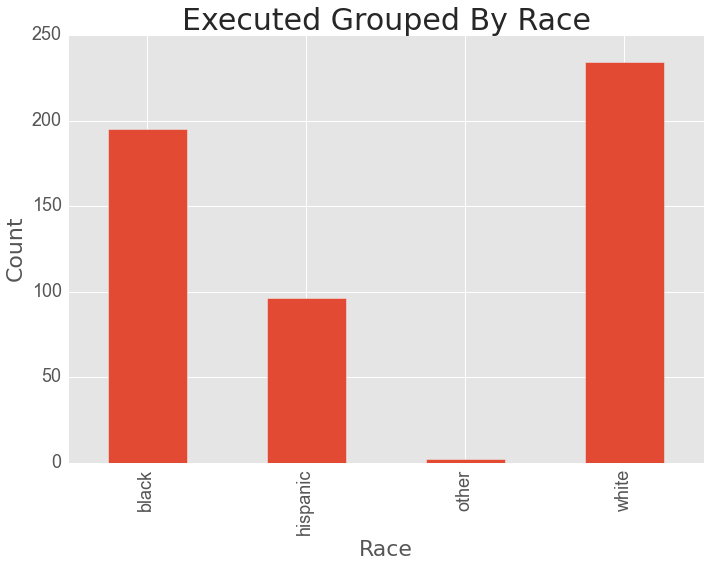

In [36]:
import numpy as np
from pandas import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = 10,8
racep = raceplot.plot(kind = 'bar')
plt.xlabel('Race', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Executed Grouped By Race', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
racep = racep.get_figure()
racep.savefig('raceplot.png')

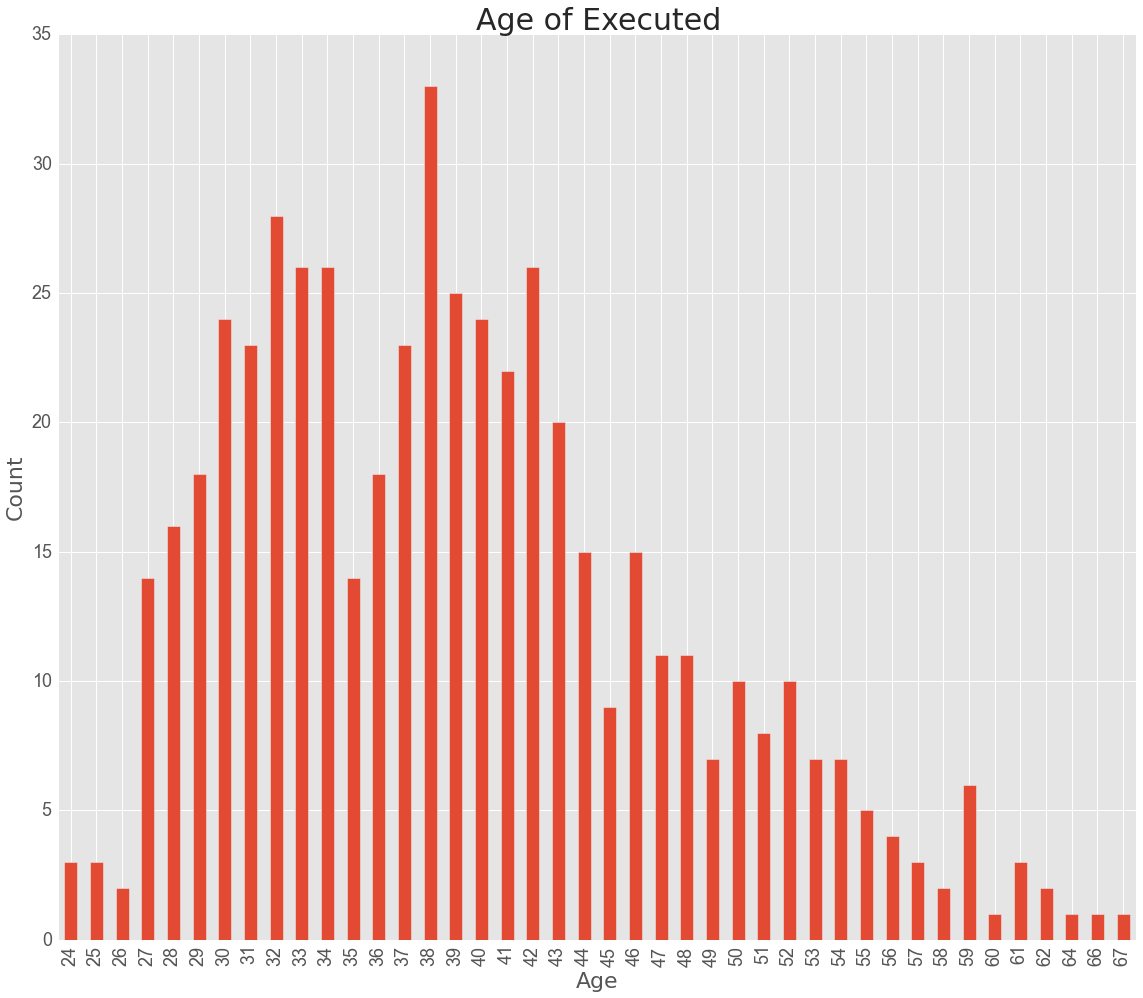

In [38]:
Exec['Age'] = (Exec['Age']).astype(str)
ageplot = Exec.groupby('Age').size()
agef = pd.DataFrame(ageplot, columns=['Count'], index=None)
countc = []
for i in agef.Count:
    countc.append(i)
agec = Exec.Age.unique()
agec = list(agec)
agec = map(int, agec)
agec = sorted(agec)
data = {'Age': agec, 'Count': countc}
agefin = pd.DataFrame(data, columns=['Age', 'Count'], index=None)
agefin
plt.rcParams["figure.figsize"] = 16, 14
agep = ageplot.plot(kind = 'bar')
plt.xlabel('Age', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Age of Executed', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 35)
plt.tight_layout()
ageplot = agep.get_figure()
ageplot.savefig('ageplot.png')

In [39]:
Exec.County = Exec.County.str.strip().str.lower()
countyg = Exec.groupby('County').size()
countyg = countyg[countyg > 10]
print countyg

County
bexar          42
brazos         12
dallas         54
harris        124
jefferson      15
lubbock        12
montgomery     15
nueces         15
smith          11
tarrant        38
dtype: int64


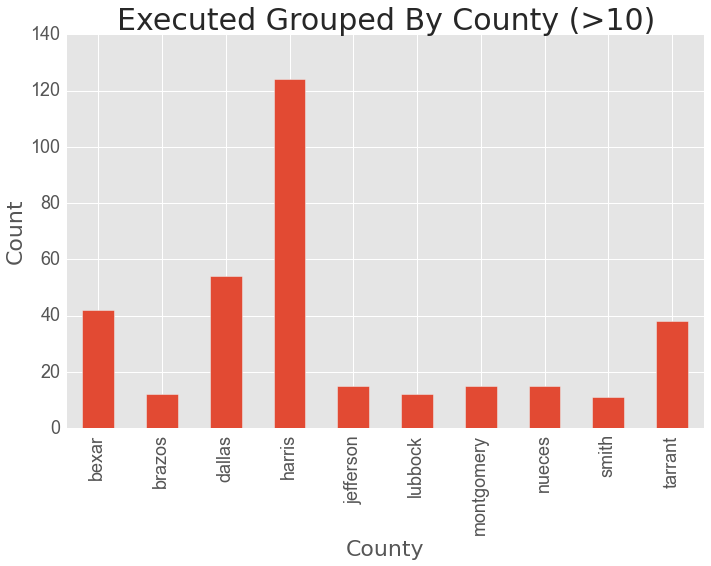

In [40]:
plt.rcParams["figure.figsize"] = 10,8
cp = countyg.plot(kind = 'bar')
plt.xlabel('County', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Executed Grouped By County (>10)', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
countyplot = cp.get_figure()
countyplot.savefig('countyplot.png')

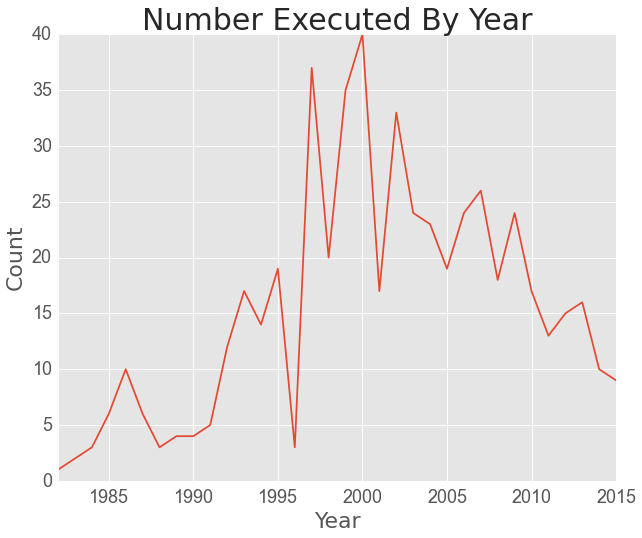

In [41]:
Exec['Date'] = pd.to_datetime(Exec['Date'])
group = Exec.groupby(lambda x: Exec['Date'][x].year)
yearp = group.size()
plt.rcParams["figure.figsize"] = 10,8
yr = yearp.plot()
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Number Executed By Year', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
yearplot = yr.get_figure()
yearplot.savefig('yearplot.png')